# Advanced Python for Data Science
### DS-GA-3001.001/.002

### Homework Assignment 04
### Due date: 03/02/2020, 10:00AM
### Student's Name: Chengwei Chen
### Student's e-mail: cc6576@nyu.edu

# Problem 1 (100 points)

The task is to optimize your solutions by using "line_profiler". 

Your submission "2020_spring_sol04_yourid.ipynb" will contain:
- the first part is your original solution (a solution that you originally wrote); 
- the second part is your final, optimized solution after using line_profiler; 
- both of which will include the line_profiler results, and your detailed comments.


The problem is to simulate a random motion of $n$ objects over a discrete time. 

Concretely, there is:
- a unit square $[0,1]^2$, 
- $n$ points within the unit square, 
- and the time is discrete $t=0, 1, 2, \dots$. 

At time $t=0$, the positions of $n$ points are randomly and uniformly distributed within the unit square; call these positions $\{p_0, p_1, p_2,\dots, p_{n-1}\}$. 

At every time step $t \geq 0$, every point $i$, chooses to randomly move in one of four directions: left, right, up, down. The distance is also random uniform number on $[0, \delta]$, where $\delta$ is given. 

That is, at every time step $t$ and for every $i$ we generate a random move as: 
$$ p_i := p_i + r_i \cdot u_i$$
where 
$$ r_i \sim uniform[0, \delta],$$ 
and 
$u_i$ represents a random direction, i.e. a randomly chosen vector among $(-1, 0), (1, 0), (0, -1), (0, 1)$.

**Dynamics**

Now, one would like to examine and plot the diagram of the minimum distance $d_{\min}$ among these $n$ points over $T$ iterations.

The task is to complete the rest of this notebook, where definitions of the functions main_orignal and main_optimized are given below. 

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from itertools import combinations
from itertools import starmap
from operator import add
import math

In [3]:
%load_ext line_profiler

---

### The original code description: 

** TO BE POPULATED **

** EXPLAIN THE SOLUTION: solution is explained in each function ** 

---


In [2]:
def distance_calculate(points):
    """
    points: n points generated randomly in the unit square
    return: min_distance
    Algorithm: in a unit square, the maximum distance is the diagonal which is square root of 2.
    We first initialize the min_distance as square root of 2, then calculate the distance of each pair of points 
    based on a formula: sqrt((x1-x2)^2)+(y1-y2)^2). If the distance is less than min_distance, change min_distance 
    to that distance. After we calculate distance of all pairs of points, function will return the min_distance 
    at T iteration.
    """
    min_distance = np.sqrt(2)  
    for p1 in points:
        for p2 in points:
            if set(p1) != set(p2):
                d = np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)
                if d < min_distance:
                    min_distance = d
    return min_distance

In [3]:
direction = ["Left", "Right", "Up", "Down"]
def direction_move(points, delta):
    """
    points: n points generated randomly in the unit square
    u_i: randomly choose from four directions(Left, Right, Up, Down)
    Left:(-1,0) Right:(1:0) Up:(0,1) Down:(0,-1)
    delta(r_i): randomly choose from uniform distribution from [0,delta]
    After we have calculated the minimum distance among n points at T iteration, 
    we need to move the points to four directions at random for calculating a 
    new minimum distance at T+1 iteration. 
    Note: we cannot move the point out of boundary. Maximum range is 1.
    """
    for p in points:
        r_i = np.random.uniform(0,delta)
        u_i = random.choice(direction)
        if(u_i == "Left"):
            p[0] = min(max(p[0] - r_i, 0), 1)
            p[1] = min(max(p[1], 0), 1)
        elif(u_i == "Right"):
            p[0] = min(max(p[0] + r_i, 0), 1)
            p[1] = min(max(p[1], 0), 1)
        elif(u_i == "Up"):
            p[0] = min(max(p[0], 0), 1)
            p[1] = min(max(p[1] + r_i, 0), 1)
        else:
            p[0] = min(max(p[0], 0), 1)
            p[1] = min(max(p[1] - r_i, 0), 1)

In [4]:
def main_original(n, delta, T): 
    """ 
    n: is the number of uniformly at random generated points in the unit square 
    delta: a maximal move of a point in one of four random directions: left, right, up, or down 
    T: number of iterations
    return: 
    lst_of_min_distances: of the minimum distances among all n points over times: t=0, 1, 2, \dots, T - 1,
    it is a list of reals of length T"""
    ## random position in unit square
    p_is = np.random.rand(n,2)
    
    lst_min_distances = []
    ## T iteration
    for t in range(T):
        min_dist = distance_calculate(p_is)
        lst_min_distances.append(min_dist)
        direction_move(list(p_is), delta)
        
    return lst_min_distances

In [5]:
n = 1000
delta = 1.0 / n
T = 25

In [8]:
%lprun -f main_original lst_min_dist = main_original(n, delta, T)

len: 25


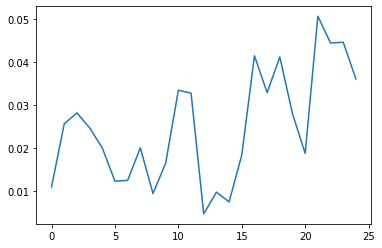

In [9]:
# plot the diagram of the minimum distances:
# where we rescale distance with by factor $\sqrt{n}$:
print("len:", len(lst_min_dist))
plt.plot(range(T), np.array(lst_min_dist) * np.sqrt(n))
plt.show()

**From the line_profiler result, the total time is 218.335 s. The function 'distance_calculate' takes 99.8% of total time, and 'direction_move' takes 0.2% of total time. It's exactly what I expected because two for-loops' run time is O(n^2). I think next we could optimize the algorithm by rewriting the 'direction_move' and 'distance_calculate' function.**

---

### The optimized code description: 

** TO BE POPULATED **

** EXPLAIN THE SOLUTION: solution is explained in each function. ** 

---


In [121]:
import scipy.spatial.distance as dist

In [122]:
def distance_calculate(points):
    """
    optimize the 'distance_calculate' function by applying build-in function which would largely decrease runtime.
    """
    min_distance = min(dist.pdist(points,"euclidean"))
    return min_distance

In [123]:
direction = ["Left", "Right", "Up", "Down"]
def direction_move(points, delta):
    """
    points: n points generated randomly in the unit square
    u_i: randomly choose from four directions(Left, Right, Up, Down)
    Left:(-1,0) Right:(1:0) Up:(0,1) Down:(0,-1)
    delta(r_i): randomly choose from uniform distribution from [0,delta]
    simplifying the function and removing redundant line to make it more efficient
    """
    for p in points:
        r_i = np.random.uniform(0,delta)
        u_i = random.choice(direction)
        if(u_i == "Left"):
            p[0] = max(p[0]-r_i, 0)
        elif(u_i == "Right"):
            p[0] = min(p[0]+r_i, 1)
        elif(u_i == "Up"):
            p[1] = min(p[1]+r_i, 1)
        else:
            p[1] = max(p[1]-r_i, 0)

In [124]:
def main_optimized(n, delta, T): 
    """ 
    n: is the number of uniformly at random generated points in the unit square 
    delta: a maximal move of a point in one of four random directions: left, right, up, or down 
    T: number of iterations
    return: 
    lst_of_min_distances: of the minimum distances among all n points over times: t=0, 1, 2, \dots, T - 1,
    it is a list of reals of length T"""
    p_is = np.random.rand(n,2)
    lst_min_distances = []
    for t in range(T):
        min_distance = distance_calculate(p_is)
        lst_min_distances.append(min_distance)
        direction_move(p_is, delta)
    
    return lst_min_distances

In [125]:
n = 1000
delta = 1.0 / n
T = 50

In [126]:
%lprun -f main_optimized lst_min_dist = main_optimized(n, delta, T)

len: 50


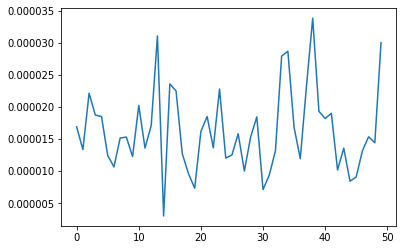

In [127]:
# plot the diagram of the minimum distances:
# where we rescale distance by a factor $\sqrt{n}$:
print("len:", len(lst_min_dist))
plt.plot(range(T), np.array(lst_min_dist) / np.sqrt(n))
plt.show()

**I improved the runtime from 218.335 s to 4.47363 s by applying build-in function method for calculating pair distance and simplifying the 'direction_move' function. The time the function 'distance_calculate' took decreases from 99.8% to 87.7%.**